# BIOS512 Assignment #5

📈 For this assignment we will work with inflation data provided by the [US Bureah of Labor Statistics](https://www.bls.gov/cpi/tables/). The data is provided as `excel` files. We hav the data for years 2016-2020 in our `assignemnts` folder under the filename `revised-seasonally-adjusted-indexes-2020.xlsx`.

Let's read the data in first. You'll need to load both the `tidyverse` and the `readxl` libraries.

In [30]:
library('tidyverse')
library('readxl')

Now you should have a function in your session called `read_excel`. Pass in the filename from above as a `string` to the `read_excel` function and capture the `tibble` output with a variable called `df_price_index`.  

In [31]:
df_price_index= read_excel('/home/studio-lab-user/BIOS512/assignments/revised-seasonally-adjusted-indexes-2020.xlsx') 

df_price_index %>% as_tibble

ITEM,TITLE,seriesid,DATA_TYPE,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2016,237.652,237.336,238.080,238.992,239.557,240.222,240.101,240.545,241.176,241.741,242.026,242.637
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2017,243.620,243.872,243.766,244.274,244.069,244.218,244.280,245.205,246.551,246.657,247.378,247.736
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2018,248.721,249.300,249.517,250.275,250.786,251.152,251.345,251.735,252.183,252.899,252.822,252.493
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2019,252.441,252.969,254.147,255.326,255.371,255.423,255.925,256.118,256.532,257.387,257.989,258.203
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2020,258.687,258.824,257.989,256.192,255.942,257.282,258.604,259.511,260.149,260.462,260.927,261.560
SA0,All items,CUSR0000SA0,SEASONAL FACTOR,2016,99.690,99.905,100.022,100.113,100.281,100.331,100.219,100.126,100.104,99.995,99.722,99.503
SA0,All items,CUSR0000SA0,SEASONAL FACTOR,2017,99.679,99.890,100.014,100.102,100.272,100.302,100.207,100.128,100.109,100.002,99.713,99.511
SA0,All items,CUSR0000SA0,SEASONAL FACTOR,2018,99.657,99.876,100.015,100.108,100.320,100.333,100.263,100.163,100.102,99.994,99.690,99.501
SA0,All items,CUSR0000SA0,SEASONAL FACTOR,2019,99.711,99.924,100.022,100.087,100.282,100.282,100.252,100.172,100.088,99.984,99.697,99.524


We want to plot the average `SEASONALLY_ADJUSTED_INDEX` for `Energy`, `Food`, `Shelter`, and `Used cars and trucks` per month for the year 2020.

You'll need this months vector for several operations:

In [32]:
months = c('JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC')

Here are the operations you'll need to perform:
- filter for...
  - `Year == 2020`, 
  - `TITLE %in% c('Energy', 'Food', 'Shelter', 'Used cars and trucks')`
  - and, `DATA_TYPE == 'SEASONALLY ADJUSTED INDEX'`
- Pivot the columns for the Months so the table is in long-form and each row represents a month (hint: use `cols = months` with `pivot_longer`)
- Group by month and `TITLE` then summarize by finding the mean index for each group.
- And last, use `forcats` to set the levels for the month column (hint: `tct_relevel(name, months)`)

In [35]:
df_price_index2 = df_price_index|>
    filter(YEAR==2020, 
           TITLE %in% c('Energy', 'Food', 'Shelter', 'Used cars and trucks'),
           DATA_TYPE=='SEASONALLY ADJUSTED INDEX') |>
    pivot_longer(cols=all_of(months), names_to='Month') |>
    group_by(Month, TITLE)|>
    summarize(Price_index=mean(value), .groups='drop')|>
    mutate(Month=fct_relevel(Month, months))

 df_price_index2  

Month,TITLE,Price_index
<fct>,<chr>,<dbl>
APR,Energy,182.5685
APR,Food,265.6865
APR,Shelter,321.0415
APR,Used cars and trucks,137.9830
AUG,Energy,192.5610
AUG,Food,268.4065
AUG,Shelter,323.1955
AUG,Used cars and trucks,148.0630
DEC,Energy,202.9670


The first three rows of your table will look something like this:

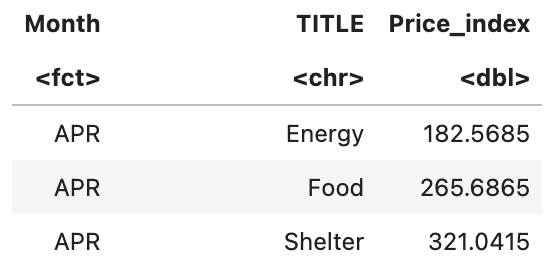

Ok! Now make this plot:

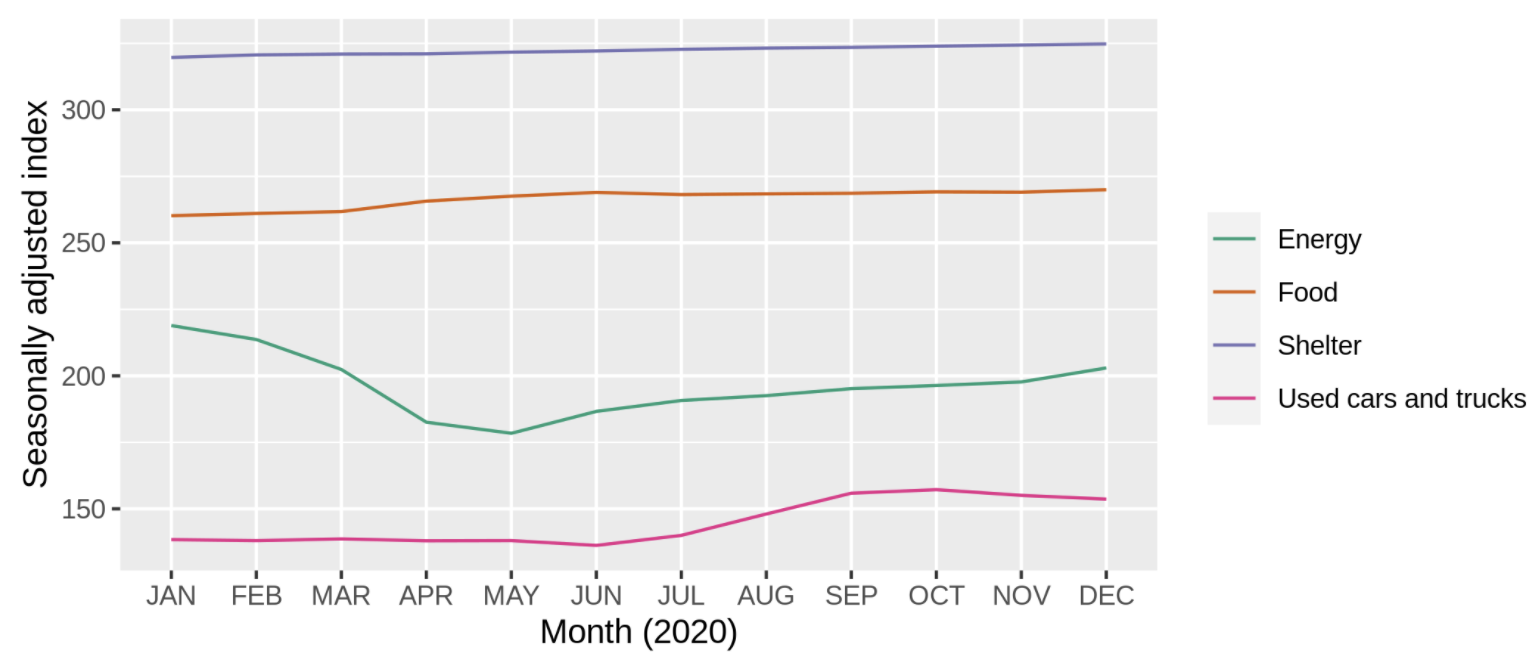

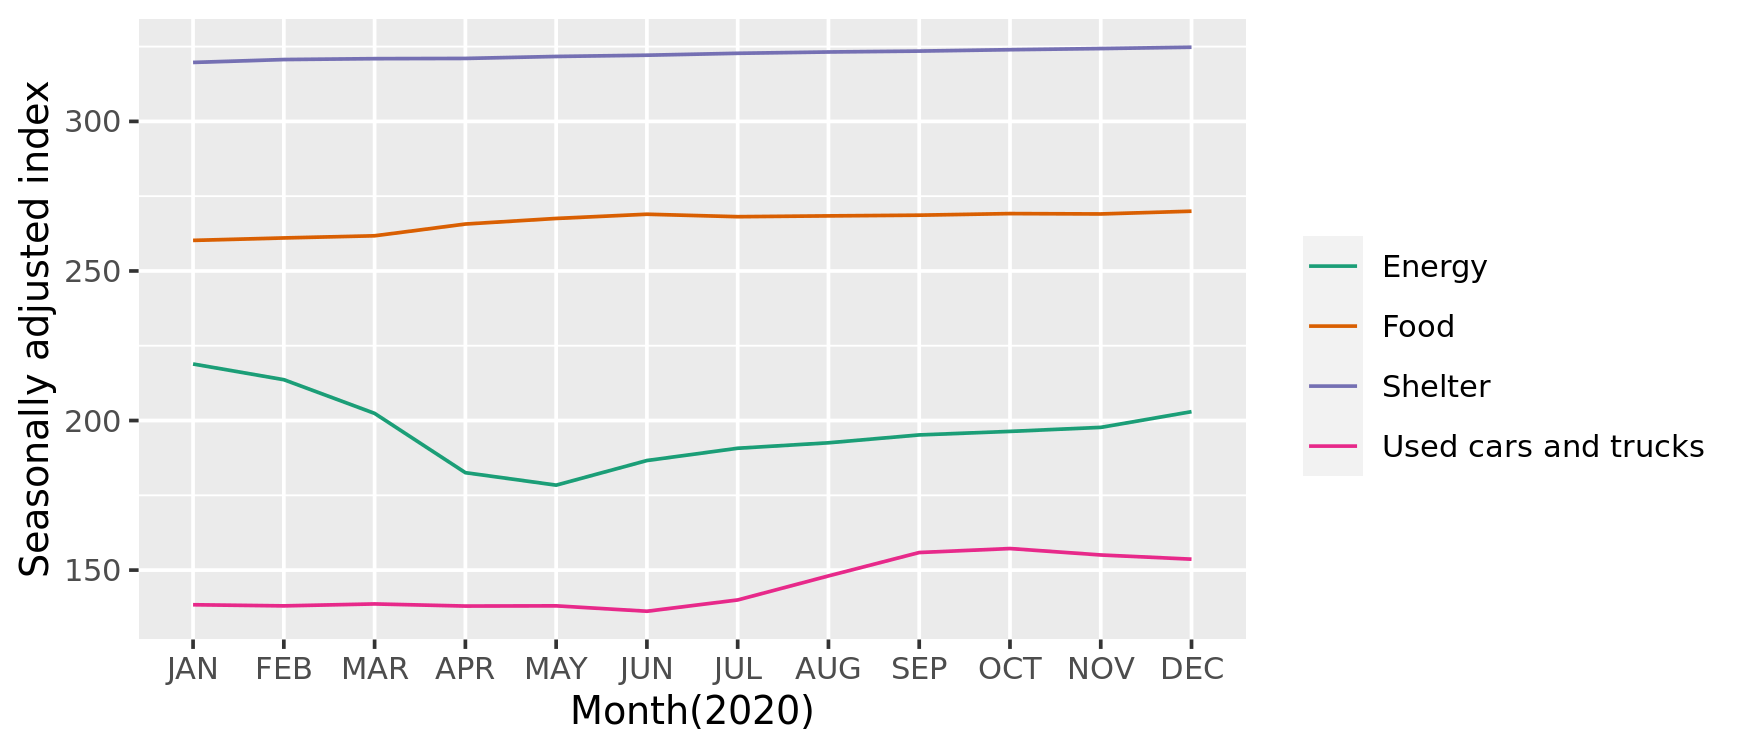

In [34]:
options(repr.plot.res=250, repr.plot.height=3)

ggplot(df_price_index2, aes(x=Month, y= Price_index, color=TITLE, group=TITLE))+
     geom_line(aes(color=TITLE, group=TITLE))+
     scale_color_brewer(palette = 'Dark2', name='')+
     labs(x='Month(2020)', y='Seasonally adjusted index')

This is how the [USBLS defines the index](https://www.bls.gov/cpi/) (if you're curious):

>  The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services.